In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    filepath_or_buffer = '../Data/DatiDefinitivi.csv'
    , index_col = 'CodiceCliente'
)

df.head()

,AnnoDocumento,NumeroDocumento,Servizio,ScadenzaFattura,ImportoFattura,ModPagamento,DescrizionePagamento,DataIncasso,ImportoIncasso,Saldo,...,FidoPayline,Decisione,ValutazioneTempiPagamento,GiorniPattuiti,GiorniRitardo,Fatturato,FatturatoMese,ClasseRischio,ClasseRischioDescrizione,Regione
CodiceCliente,,,,,,,,,,,,,,,,,,,,,
8995,2021,300377,EE,2021-05-13,1482.55,G20,20 gg data emissione fattura,2021-05-13 00:00:00.000000,1482.55,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,512570,EE,2021-09-13,1424.50,G20,20 gg data emissione fattura,2021-09-13 00:00:00.000000,1424.50,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2022,89430,EE,2022-02-11,1527.13,G20,20 gg data emissione fattura,2022-02-11 00:00:00.000000,1527.13,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,622538,EE,2021-11-11,1501.59,G20,20 gg data emissione fattura,2021-11-11 00:00:00.000000,1501.59,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,714559,EE,2021-12-13,1312.98,G20,20 gg data emissione fattura,2021-12-13 00:00:00.000000,1312.98,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto


# Divisione Dataset
Il dataset è composto sia da fatture storiche che fatture nuove, per l'esplorazione dei dati e per il modello si è deciso di usare solo lo storico in quanto con informazioni più complete.

Questo comporta la divisione del dataset in due subset, il punto di divisione viene deciso dalla data di Scadenza Fattura. Il primo subset è antecedente alla data del 01-03-2022 mentre il secondo è posteriore alla data in oggetto.

In [3]:
# Definiamo una data di snapshot
SnapshotData = '2022-03-01'

In [4]:
# definiamo il subset storico con tutti gli esempi la cui data ScadenzaFattura compresa tra la data di snapshot e il 01-01-2022
df_storico = df[(df['ScadenzaFattura'] < SnapshotData) & (df['ScadenzaFattura'] > '2021-12-01')]

#Stampiamo le prime righe per controllo
df_storico.head()

,AnnoDocumento,NumeroDocumento,Servizio,ScadenzaFattura,ImportoFattura,ModPagamento,DescrizionePagamento,DataIncasso,ImportoIncasso,Saldo,...,FidoPayline,Decisione,ValutazioneTempiPagamento,GiorniPattuiti,GiorniRitardo,Fatturato,FatturatoMese,ClasseRischio,ClasseRischioDescrizione,Regione
CodiceCliente,,,,,,,,,,,,,,,,,,,,,
8995,2022,89430,EE,2022-02-11,1527.13,G20,20 gg data emissione fattura,2022-02-11 00:00:00.000000,1527.13,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.30,4,Affidabile,Veneto
8995,2021,714559,EE,2021-12-13,1312.98,G20,20 gg data emissione fattura,2021-12-13 00:00:00.000000,1312.98,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.30,4,Affidabile,Veneto
8995,2021,771454,EE,2022-01-12,1476.30,G20,20 gg data emissione fattura,2022-01-12 00:00:00.000000,1476.30,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.30,4,Affidabile,Veneto
11639,2022,132551,Gas,2022-02-28,26656.50,G20,20 gg data emissione fattura,2022-02-28 00:00:00.000000,26656.50,0.0,...,5000.0,Da ridurre,Regolari,25.0,0.0,216724.83,40552.37,4,Affidabile,EmiliaRomagna
11639,2021,755041,Gas,2021-12-31,15382.88,G20,20 gg data emissione fattura,2021-12-31 00:00:00.000000,15382.88,0.0,...,5000.0,Da ridurre,Regolari,25.0,0.0,216724.83,40552.37,4,Affidabile,EmiliaRomagna


In [5]:
# definiamo il subset storico con tutti gli esempi la cui data ScadenzaFattura è anteriore al 01-03-2022
df_nuove = df[df['ScadenzaFattura'] >= SnapshotData]

#Stampiamo le prime righe per controllo
df_nuove.head()

,AnnoDocumento,NumeroDocumento,Servizio,ScadenzaFattura,ImportoFattura,ModPagamento,DescrizionePagamento,DataIncasso,ImportoIncasso,Saldo,...,FidoPayline,Decisione,ValutazioneTempiPagamento,GiorniPattuiti,GiorniRitardo,Fatturato,FatturatoMese,ClasseRischio,ClasseRischioDescrizione,Regione
CodiceCliente,,,,,,,,,,,,,,,,,,,,,
8995,2022,149325,EE,2022-03-14,2441.93,G20,20 gg data emissione fattura,2022-10-31 09:54:56.018911,0.0,-2441.93,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.30,4,Affidabile,Veneto
11639,2022,148948,EE,2022-03-14,1850.32,G20,20 gg data emissione fattura,2022-10-31 09:54:56.018911,0.0,-1850.32,...,5000.0,Da ridurre,Regolari,25.0,0.0,216724.83,40552.37,4,Affidabile,EmiliaRomagna
11639,2022,150585,EE,2022-03-14,22.64,G20,20 gg data emissione fattura,2022-10-31 09:54:56.018911,0.0,-22.64,...,5000.0,Da ridurre,Regolari,25.0,0.0,216724.83,40552.37,4,Affidabile,EmiliaRomagna
11639,2022,151567,EE,2022-03-14,43.46,G20,20 gg data emissione fattura,2022-10-31 09:54:56.018911,0.0,-43.46,...,5000.0,Da ridurre,Regolari,25.0,0.0,216724.83,40552.37,4,Affidabile,EmiliaRomagna
11639,2022,150780,EE,2022-03-14,26.29,G20,20 gg data emissione fattura,2022-10-31 09:54:56.018911,0.0,-26.29,...,5000.0,Da ridurre,Regolari,25.0,0.0,216724.83,40552.37,4,Affidabile,EmiliaRomagna


# Esplorazione dei dati
Analizziamo i dati del solo anno 2021 per poter capire ed estrapolare eventuali andamenti o info varie

In [6]:
# Estraiamo le fatture con AnnoDocumento, emissione della fattura, pari al 2021
df_2021 = df[df['AnnoDocumento'] == 2021]

# Stampiamo per un controllo le prime righe
df_2021.head()

,AnnoDocumento,NumeroDocumento,Servizio,ScadenzaFattura,ImportoFattura,ModPagamento,DescrizionePagamento,DataIncasso,ImportoIncasso,Saldo,...,FidoPayline,Decisione,ValutazioneTempiPagamento,GiorniPattuiti,GiorniRitardo,Fatturato,FatturatoMese,ClasseRischio,ClasseRischioDescrizione,Regione
CodiceCliente,,,,,,,,,,,,,,,,,,,,,
8995,2021,300377,EE,2021-05-13,1482.55,G20,20 gg data emissione fattura,2021-05-13 00:00:00.000000,1482.55,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,512570,EE,2021-09-13,1424.50,G20,20 gg data emissione fattura,2021-09-13 00:00:00.000000,1424.50,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,622538,EE,2021-11-11,1501.59,G20,20 gg data emissione fattura,2021-11-11 00:00:00.000000,1501.59,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,714559,EE,2021-12-13,1312.98,G20,20 gg data emissione fattura,2021-12-13 00:00:00.000000,1312.98,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto
8995,2021,559762,EE,2021-10-12,1483.06,G20,20 gg data emissione fattura,2021-10-12 00:00:00.000000,1483.06,0.0,...,3000.0,Accordabile,Regolari,23.0,0.0,17412.82,1476.3,4,Affidabile,Veneto


## Andamento CMOR mensile

<AxesSubplot:xlabel='ScadenzaFatturaMese', ylabel='CMOR'>

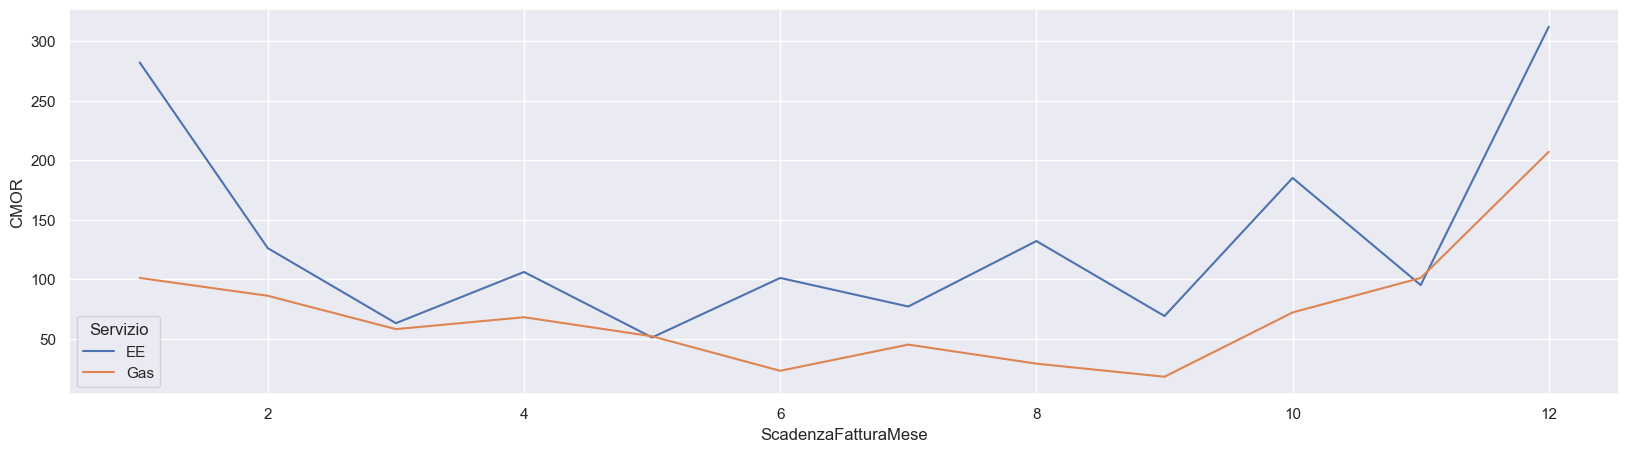

In [7]:
# Creiamo un sotto insieme con i dati da analizzare
AndamentoCMOR = df_2021[['AnnoDocumento','Servizio','ScadenzaFatturaMese','CMOR']].groupby(
                    by=['AnnoDocumento','Servizio','ScadenzaFatturaMese']).sum()

# Eliminiamo l'index dal subset
AndamentoCMOR = AndamentoCMOR.reset_index()

# Settiamo le dimensioni del grafico
sns.set(rc={'figure.figsize':(20,5)})

# Stampiamo il grafico
sns.lineplot(
    data = AndamentoCMOR
    , x = 'ScadenzaFatturaMese'
    , y = 'CMOR'
    , hue = 'Servizio'
)

## Correlazione

<AxesSubplot:>

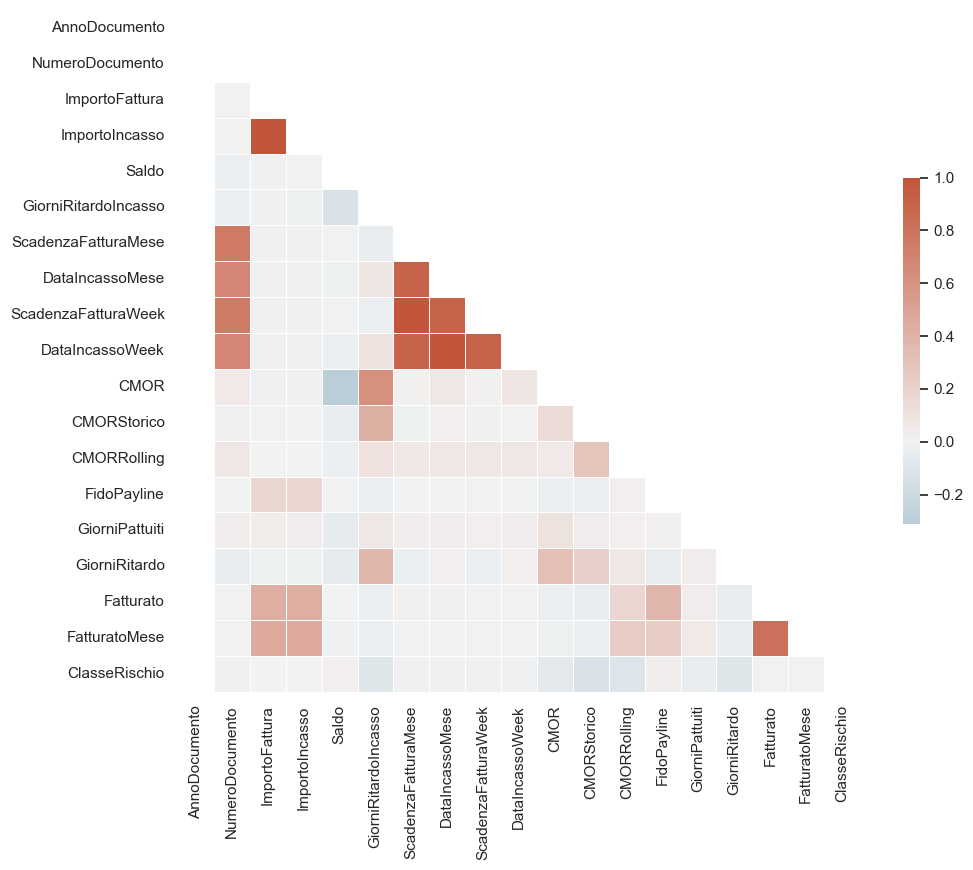

In [8]:
# Settiamo il tema del grafico
sns.set_theme(style="white")

# Generiamo la matrice di correlazione
corr = df_2021.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generiamo la palette per la colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Stampiamo il grafico di correlazione
sns.heatmap(
    data = corr
    , mask = mask
    , cmap = cmap
    , vmax = corr.max()[1]
    , center = 0.0
    , square = True
    , linewidths = .5
    , cbar_kws = {"shrink": .5}
)

## Importo Fattura per Servizio

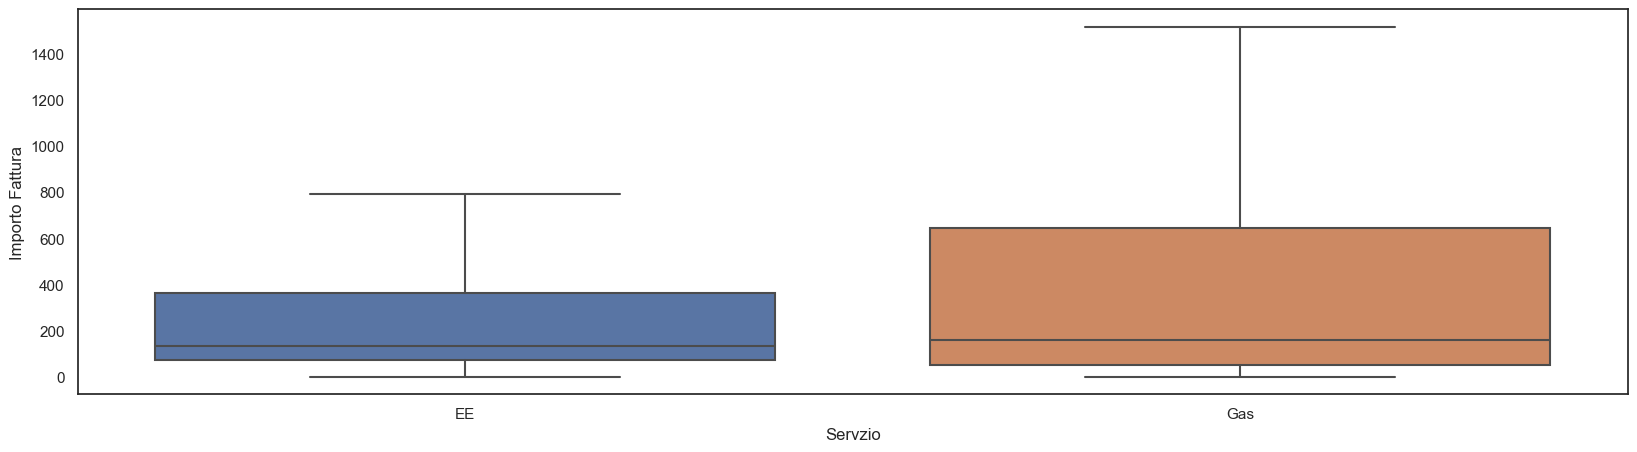

In [18]:
# Generiamo il grafico
sns.boxplot(
    data = df_2021[(df_2021['CMOR'] == 1)]
    , x = 'Servizio'
    , y = 'ImportoFattura'
    , showfliers = False
).set(
    xlabel = 'Servzio'
    , ylabel = 'Importo Fattura'   
)


plt.show()

## Confronto tra Importo Medio Fattura e CMOR

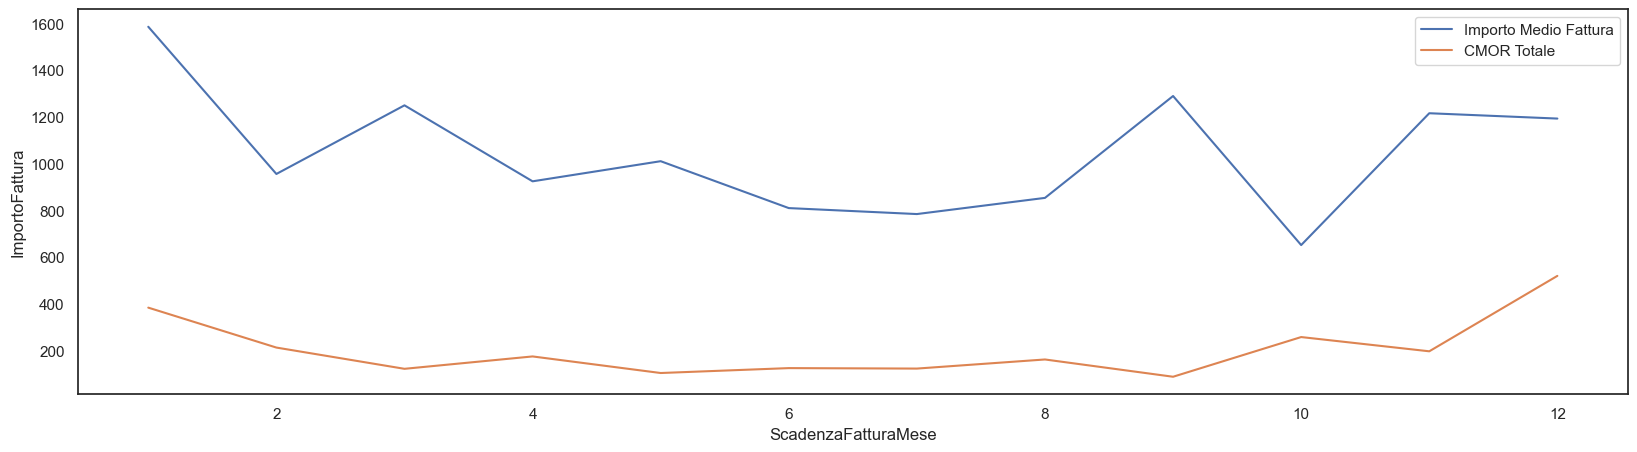

In [19]:
# Creiamo un subset con la media dell'importo per mese
ImportoFatturaMedioMensile = df_2021[
                                ['ScadenzaFatturaMese','ImportoFattura']
                            ].groupby('ScadenzaFatturaMese').mean()

# Creiamo un subset con la somma dei CMOR per mese
CMORTotaleMensile = df_2021[
                        ['ScadenzaFatturaMese','CMOR']
                    ].groupby(
                        by='ScadenzaFatturaMese'
                    ).sum()

# Stampiano l'andamento mensile del fatturato medio
sns.lineplot(
    data = ImportoFatturaMedioMensile
    , x = 'ScadenzaFatturaMese'
    , y = 'ImportoFattura'
)

# Stampiamo l'andamente del CMOR per mese
sns.lineplot(
    data = CMORTotaleMensile
    , x = 'ScadenzaFatturaMese'
    , y = 'CMOR'
)

# Impostiamo la leggenda del grafico
plt.legend(labels=['Importo Medio Fattura','CMOR Totale'])
plt.show()

## CMOR per Regione


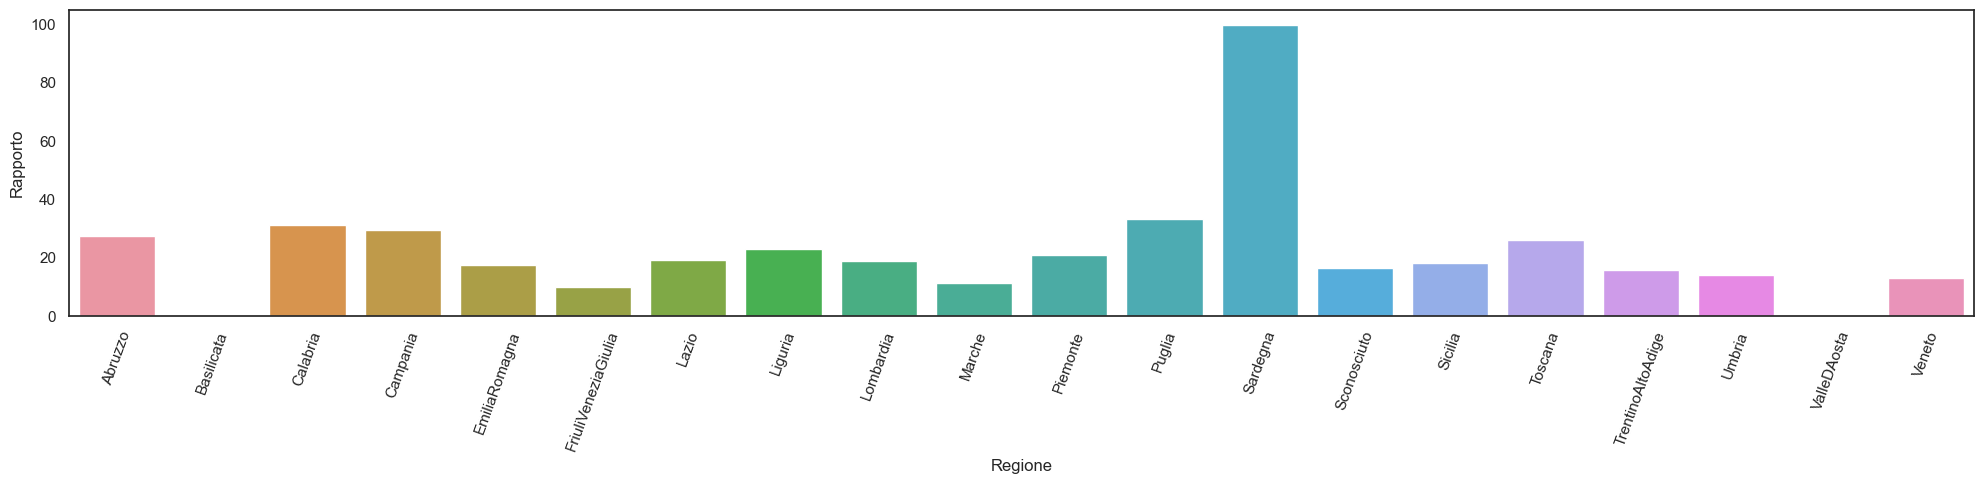

In [20]:
# Creiamo un subset con il totale dei CMOR Storici per ogni regione
TotCmor = df_2021[['Regione','CMORStorico']].groupby(by='Regione').sum()

# Creiamo un subset con il totale delle fatture per ogni regione
TotFatture = df_2021[['Regione','ChiaveFattura']].groupby(by='Regione').count()

# Creiamo un subset con il rapporto tra CMOR e Totale Fatture
TotCmor['Rapporto'] = TotCmor['CMORStorico'] / TotFatture['ChiaveFattura'] * 100

# Resettiamo l'index del subset
TotCmor.reset_index(inplace=True)

# Stampiamo il grafico a barre
sns.barplot(
    data = TotCmor
    , x = TotCmor['Regione']
    , y = 'Rapporto'
    , order = TotCmor['Regione'].sort_values()
)

# Impostiamo un valore per leggere meglio le etichette sull'asse X
plt.xticks(rotation=70)
plt.tight_layout()

## Andamento mensile giorni di ritardo incasso per servizio

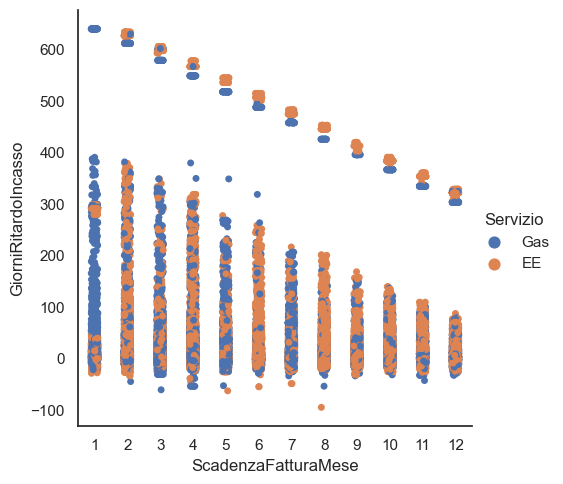

In [21]:
# Estraiamo il subset dei dati dei giorni di ritardo
GiorniRitardo2021 = df_2021[(df_2021['GiorniRitardoIncasso'] != 0)]

#Stampiamo il grafico
sns.catplot(
    data = GiorniRitardo2021
    , x = 'ScadenzaFatturaMese'
    , y = 'GiorniRitardoIncasso'
    , hue = 'Servizio'
)

## Clienti morosi per classe di rischio

[Text(0.5, 0, 'Descrizione classe di rischio'), Text(0, 0.5, 'CMOR')]

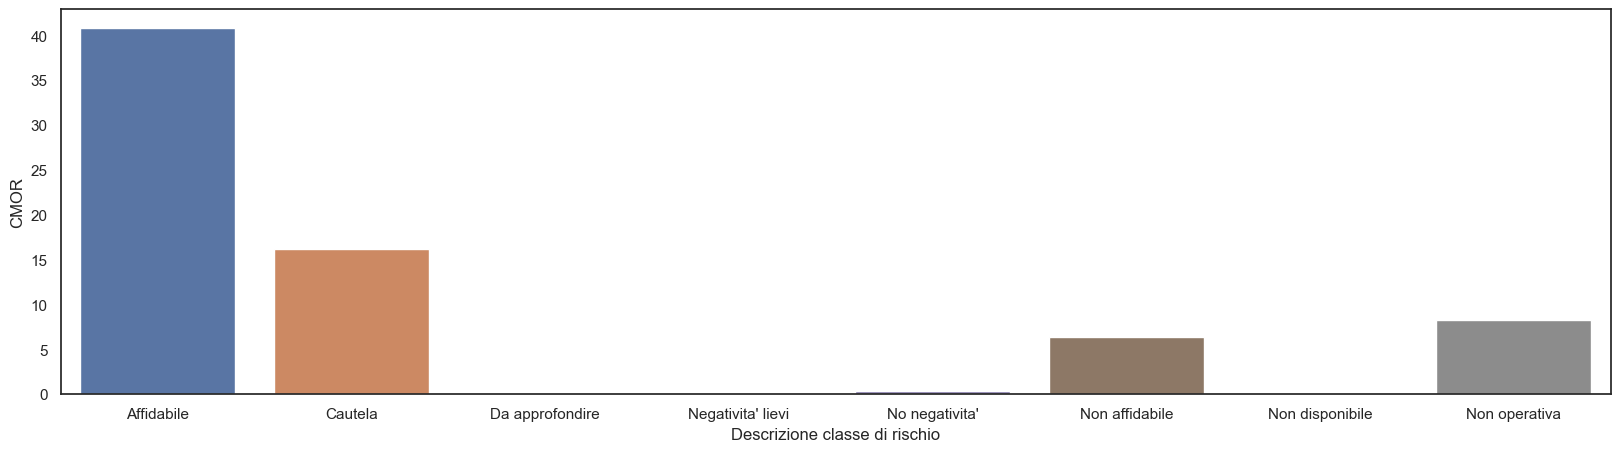

In [27]:
# Creiamo il subset dei dati sui clienti morosi per classe di rischio
MorosiClasseRischio = round(
                            (df_2021[
                                ['ClasseRischioDescrizione','CMOR']
                            ].groupby(
                                by = ['ClasseRischioDescrizione']
                            ).sum() / df_storico['CMOR'][df_storico['CMOR'] == 1].sum()) * 100
                        ,2 )

# Rimuoviamo l'indice dal subset
MorosiClasseRischio.reset_index(inplace=True)

# Stampiamo il grafico
sns.barplot(
    data = MorosiClasseRischio
    , x = 'ClasseRischioDescrizione'
    , y = 'CMOR'
).set(
    xlabel = 'Descrizione classe di rischio'
    , ylabel = 'CMOR'
)